# Naive Bayes approach

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import common

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.dummy
import sklearn.naive_bayes

In [2]:
train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset('full', 'count', None)
baseline_classifier = sklearn.dummy.DummyClassifier()
baseline_classifier.fit(train_as_vec, train_targets)

/home/asgavar/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/home/asgavar/.local/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


DummyClassifier(constant=None, random_state=None, strategy='warn')

SCORE: 0.2000767102404101
[[0.0605044  0.06065865 0.11830942 0.22335339 0.53717415]
 [0.06114924 0.0627574  0.11786625 0.22937831 0.52884879]
 [0.06183259 0.05987122 0.12053492 0.22365527 0.53410599]
 [0.05973348 0.06221977 0.12017435 0.22433864 0.53353376]
 [0.06059053 0.06072749 0.11842413 0.2257322  0.53452565]]


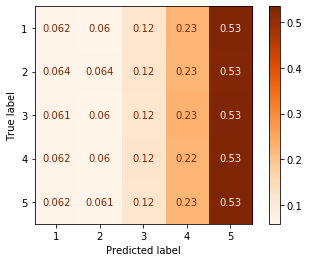

In [5]:
common.display_classifier_performance(baseline_classifier, test_as_vec, test_targets)

## Performance measure row schema

In [3]:
results_df = pd.DataFrame.from_dict([
    common.perf_row(
        baseline_classifier, test_as_vec, test_targets, 'baseline',
        'full', 'count', None, fit_prior='N/A', alpha='N/A')])
results_df

,classifier_type,sampling,representation,preprocessing,fit_prior,alpha,real_world_acc,score,order_aware_error_1,order_aware_error_2,order_aware_error_3,order_aware_error_4,order_aware_error_5,order_aware_error_avg
0,baseline,full,count,None,N/A,N/A,0.357489,0.199675,3.31997,2.386891,1.673749,1.240585,1.909803,2.1062


## One multi-class combined classifier, exposed to all classes at once

In [ ]:
for sampling in ['random_downsampling', 'full', 'oversampled']:
    print(f'sampling = {sampling}')
    for representation in ['count', 'tf_idf']:
        print(f'    representation = {representation}')
        for preprocessing in [None, 'stem']:
            print(f'        preprocessing = {preprocessing}')
            for fit_prior in [False, True]:
                print(f'            fit_prior = {fit_prior}')
                for alpha in np.arange(0.1, 5., .1):

                    train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset(
                        sampling, representation, preprocessing)

                    classifier = sklearn.naive_bayes.MultinomialNB(fit_prior=fit_prior, alpha=alpha)
                    classifier.fit(train_as_vec, train_targets)

                    results_df = results_df.append([
                            common.perf_row(
                                classifier, test_as_vec, test_targets,
                                'multiclass', sampling, representation, 
                                preprocessing, fit_prior=fit_prior, alpha=alpha)])

sampling = random_downsampling
    representation = count
        preprocessing = None
            fit_prior = False
            fit_prior = True
        preprocessing = stem
            fit_prior = False


## Word representation <-> score correlation

In [5]:
results_df.sort_values('score', ascending=False).head(100)['representation'].value_counts()

tf_idf    100
Name: representation, dtype: int64

In [6]:
results_df.sort_values('real_world_acc', ascending=False).head(100)['representation'].value_counts()

count    100
Name: representation, dtype: int64

## Training dataset <-> score correlation

In [7]:
results_df.sort_values('score', ascending=False).head(100)['sampling'].value_counts()

oversampled            63
random_downsampling    37
Name: sampling, dtype: int64

In [11]:
results_df.sort_values('score', ascending=False).head(25)['sampling'].value_counts()

random_downsampling    16
oversampled             9
Name: sampling, dtype: int64

In [8]:
results_df.sort_values('real_world_acc', ascending=False).head(100)['sampling'].value_counts()

full    100
Name: sampling, dtype: int64

## Best of the best!

In [9]:
results_df.sort_values('score', ascending=False).head(25)

,classifier_type,sampling,representation,preprocessing,fit_prior,alpha,real_world_acc,score,order_aware_error_1,order_aware_error_2,order_aware_error_3,order_aware_error_4,order_aware_error_5,order_aware_error_avg
0,multiclass,random_downsampling,tf_idf,None,True,0.5,0.488517,0.473654,1.619118,1.246848,1.309533,1.316007,1.673930,1.433087
0,multiclass,random_downsampling,tf_idf,None,True,0.6,0.483441,0.473553,1.599572,1.235634,1.300285,1.312845,1.659276,1.421522
0,multiclass,random_downsampling,tf_idf,None,False,0.5,0.485571,0.473528,1.564222,1.253281,1.294462,1.344850,1.700995,1.431562
0,multiclass,random_downsampling,tf_idf,stem,True,0.6,0.483140,0.473487,1.600641,1.237832,1.300724,1.312756,1.659905,1.422372
0,multiclass,oversampled,tf_idf,None,False,1.7,0.487805,0.473260,1.534214,1.226884,1.306507,1.364558,1.786619,1.443756
0,multiclass,random_downsampling,tf_idf,None,True,0.7,0.478611,0.473258,1.584076,1.228488,1.292567,1.308899,1.646435,1.412093
0,multiclass,random_downsampling,tf_idf,stem,True,0.5,0.488124,0.473246,1.618626,1.248743,1.309572,1.316240,1.674134,1.433463
0,multiclass,random_downsampling,tf_idf,None,False,0.4,0.490393,0.473210,1.585699,1.263219,1.303728,1.346984,1.717664,1.443459
0,multiclass,random_downsampling,tf_idf,None,True,0.4,0.493327,0.473200,1.643129,1.255679,1.319743,1.320129,1.689697,1.445675
0,multiclass,oversampled,tf_idf,None,False,1.8,0.485786,0.473197,1.525258,1.223438,1.303898,1.364743,1.786964,1.440860


In [1]:
results_df.sort_values('real_world_acc', ascending=False).head(25)

NameError: name 'results_df' is not defined

In [35]:
train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset(
    'random_downsampling', 'tf_idf', None)

best_balanced = sklearn.naive_bayes.MultinomialNB(alpha=0.5)
best_balanced.fit(train_as_vec, train_targets)

MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True)

SCORE: 0.4736542603211971
[[0.60909301 0.25119543 0.07203455 0.03304797 0.03462903]
 [0.24655815 0.39952932 0.23989017 0.07981957 0.03420278]
 [0.10791481 0.19114413 0.39982169 0.22325904 0.07786033]
 [0.05742403 0.06501815 0.24191954 0.43081548 0.20482279]
 [0.05848307 0.02941605 0.08313194 0.29995714 0.52901179]]


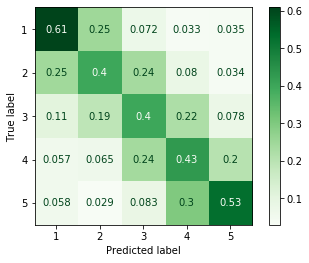

In [39]:
common.display_classifier_performance(best_balanced, test_as_vec, test_targets)

In [40]:
train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset(
    'full', 'count', None)

best_real_world = sklearn.naive_bayes.MultinomialNB(alpha=1.9)
best_real_world.fit(train_as_vec, train_targets)

/home/asgavar/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


MultinomialNB(alpha=1.9, class_prior=None, fit_prior=True)

SCORE: 0.4077921971996866
[[4.71656640e-01 7.11476168e-02 1.47192658e-01 6.55560697e-02
  2.44447015e-01]
 [1.67130810e-01 7.68778192e-02 3.42851540e-01 1.71680722e-01
  2.41459110e-01]
 [4.89747400e-02 1.58098068e-02 2.98999505e-01 2.95770183e-01
  3.40445765e-01]
 [1.52090464e-02 2.28863899e-03 9.41983002e-02 3.30156980e-01
  5.58147035e-01]
 [1.16374111e-02 7.77594670e-04 1.68729207e-02 1.09442032e-01
  8.61270042e-01]]


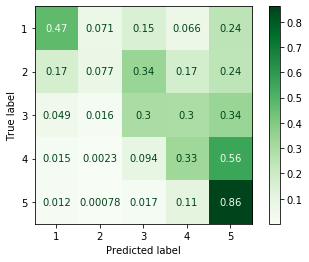

In [43]:
common.display_classifier_performance(best_real_world, test_as_vec, test_targets)

## Balanced vs Simple accuracy

In [48]:
top_balanced = results_df.sort_values('score', ascending=False).head(100)
top_simple = results_df.sort_values('real_world_acc', ascending=False).head(100)

In [50]:
balanced_X, balanced_Y = top_balanced['score'].values, top_balanced['real_world_acc'].values
simple_X, simple_Y = top_simple['real_world_acc'].values, top_simple['score'].values

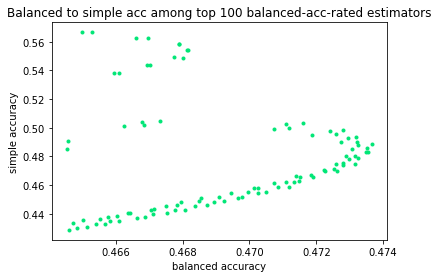

In [76]:
plt.title('Balanced to simple acc among top 100 balanced-acc-rated estimators')
plt.xlabel('balanced accuracy')
plt.ylabel('simple accuracy')
plt.plot(balanced_X, balanced_Y, color='#00e676', linestyle='', marker='.')

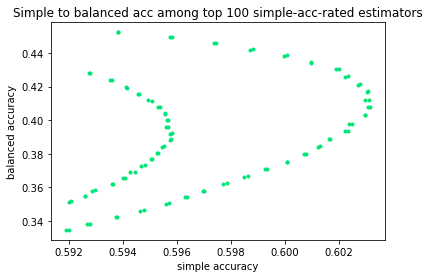

In [78]:
plt.title('Simple to balanced acc among top 100 simple-acc-rated estimators')
plt.xlabel('simple accuracy')
plt.ylabel('balanced accuracy')
plt.plot(simple_X, simple_Y, color='#00e676', linestyle='', marker='.')